In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist


def accuracy(Y,P):
    return np.count_nonzero(np.equal(np.argmax(Y,axis=-1),np.argmax(P,axis=-1)).astype(int))/float(Y.shape[0])

def visualize(data):
    p = data.reshape((28,28))
    plt.imshow(p,interpolation='none', cmap='gray_r')
    plt.show()

%matplotlib inline

C:\Users\dangra\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2]))/255.
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2]))/255.

In [3]:
print(x_train.shape)
print(y_train.shape)
print(y_train[0:10])
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
[5 0 4 1 9 2 1 3 1 4]
(10000, 784)
(10000,)


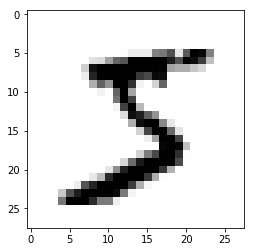

In [4]:
visualize(x_train[0])

In [5]:
y_train[0]

5

In [6]:
def one_hot(y):
    #vec = np.zeros(max(y)+1)
    y_oh= np.zeros((len(y),max(y)+1))
    for i in range(len(y)):
        y_oh[i][y[i]] = 1
    return y_oh

In [7]:
one_hot(y_train)[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [8]:
y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)

print(y_train_oh.shape)
print(y_test_oh.shape)

(60000, 10)
(10000, 10)


In [9]:
def initialize_weights(layer_dimensions):
    parameters={}
    #b = np.zeros((layer_dimensions[1],1))
    #W = np.random.randn(layer_dimensions[1], layer_dimensions[0]) * 0.01
    #for i in range(1,layer_dimensions[0]):
        #parameters.update( {"W"+str(i): W,"b"+str(i): b})

    k=1
    for elem in layer_dimensions[1:]:
        W = 0.01*np.random.randn(elem, layer_dimensions[k-1])
        b = np.zeros((elem, 1))
        parameters.update({'W'+str(k): W, 'b'+str(k): b})
        k+=1
    return parameters

In [10]:
np.random.seed(0)
parameters = initialize_weights([3,6])
print("W1.shape=",parameters["W1"].shape)
print("b1.shape=",parameters["b1"].shape)
print("W1=",parameters["W1"])
print("b1=",parameters["b1"])

W1.shape= (6, 3)
b1.shape= (6, 1)
W1= [[ 0.01764052  0.00400157  0.00978738]
 [ 0.02240893  0.01867558 -0.00977278]
 [ 0.00950088 -0.00151357 -0.00103219]
 [ 0.00410599  0.00144044  0.01454274]
 [ 0.00761038  0.00121675  0.00443863]
 [ 0.00333674  0.01494079 -0.00205158]]
b1= [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [11]:
def linear_forward(W, b, a_prev):
    Z = np.dot(W, a_prev) + b 


    cache = (Z, W, a_prev)
    
    
    return Z, cache

In [12]:
np.random.seed(0)
parameters = initialize_weights([3,2])
x = np.random.randn(1,3).T
Z, cache = linear_forward(parameters["W1"],parameters["b1"],x)
print(Z)

[[0.01514415]
 [0.01947252]]


In [13]:
def activation_forward(Z):
    
    a = 1/(1+np.exp(-Z))
   
    
    return a

In [14]:
np.random.seed(0)
Z = np.random.randn(2,3)
activation_forward(Z)

array([[0.85371646, 0.59872543, 0.72685773],
       [0.9038621 , 0.86617546, 0.27343225]])

In [15]:
def softmax(Z):
    a=np.zeros(Z.shape)
    #num = np.exp(Z)
    #den= np.sum(np.exp(Z))
    #a = num/den
    den = 0
    for i in range(len(Z)):
        den = sum([np.exp(x) for x in Z[i]])
        for j in range(len(Z[i])):
            a[i][j] = np.exp(Z[i][j])/den
    
    return a

In [16]:
np.random.seed(0)
Z = np.random.randn(2,3)
softmax(Z)


array([[0.58423523, 0.14936733, 0.26639744],
       [0.57854881, 0.39829292, 0.02315827]])

In [24]:
def nn_forward(parameters, X):
    caches = []
    L = len(parameters) // 2
    a = X.T
    
    for i in range(L):
        (Z, cache) = linear_forward(parameters['W'+str(i+1)], parameters['b'+str(i+1)], a)
        a = activation_forward(Z)
        caches.append(cache)
        
    
    Z = Z.T
    
    
    a = softmax(Z)
    return (a,caches)

In [25]:
np.random.seed(1)
parameters = initialize_weights([3,4,2])
x = np.random.randn(2,3)
AL, cache = nn_forward(parameters, x)
print(AL)

[[0.49967587 0.50032413]
 [0.49966831 0.50033169]]


In [26]:
def crossentropy(P, Y):
    loss = 0
    
    for i in range(len(P)):
        for j in range(len(P[i])):
            loss += -Y[i][j] * np.log(P[i][j])
    loss = loss / len(P)
    return loss

In [27]:
np.random.seed(1)
parameters = initialize_weights([3,4,2])
x = np.random.randn(2,3)
AL, cache = nn_forward(parameters, x)
y = np.array(([[0,1],[1,0]]))
crossentropy(AL,y)

0.6931549552268021

In [32]:
def losssoftmax_backward(P,Y):
    #dldZ = np.zeros(P.shape)
    dLdZ = (P-Y).T / len(P)
    #dldZ = dldZ / len(P)
  
    
    return dLdZ

In [33]:
np.random.seed(1)
parameters = initialize_weights([3,4,2])
x = np.random.randn(3,3)
AL, cache = nn_forward(parameters, x)
y = np.array(([[0,1],[1,0],[1,0]]))

losssoftmax_backward(AL,y)

array([[ 0.16655862, -0.16677723, -0.16676625],
       [-0.16655862,  0.16677723,  0.16676625]])

In [48]:
def activation_backward(dLda, cache):
    Z = cache[0]
    dLdZ = np.zeros(Z.shape)
    g2 = activation_forward(Z)*(1-(activation_forward(Z)))
    for i in range(len(Z)):
        for j in range(len(Z[i])):
            dLdZ[i][j]= g2[i][j]* dLda[i][j]
    
    
    return dLdZ

In [49]:
np.random.seed(1)
Z      = np.random.randn(4,2)
W      = np.random.randn(4,3)
a_prev = np.random.randn(3,2)
dLda   = np.random.randn(4,2)
    

dLdZ = activation_backward(dLda, (Z, W, a_prev))

dLdZ

array([[-0.01689878, -0.2133506 ],
       [-0.06251018,  0.10071241],
       [-0.14419048, -0.03281763],
       [-0.08698937, -0.18342292]])

In [50]:
def linear_backward(dLdZ, cache):
    W = cache[1]
    a_prev = cache[2]
    dLda = np.dot(W.T, dLdZ)
    dLdW = np.dot(dLdZ, a_prev.T)
    dLdb = np.zeros((len(dLdZ),1))
    for i in range(len(dLdZ)):
        dLdb[i] = sum(dLdZ[i])
    return (dLda, dLdW, dLdb)

In [51]:
np.random.seed(1)
parameters = initialize_weights([3,2,2])
x = np.random.randn(3,3)
AL, cache = nn_forward(parameters, x)
y = np.array(([[0,1],[1,0],[1,0]]))

dLdZ=losssoftmax_backward(AL,y)

dLda, dLdW, dLdb = linear_backward(dLdZ, cache[-1])
print("dLda=",dLda)
print("dLdW=",dLdW)
print("dLdb=",dLdb)

dLda= [[ 0.00238192 -0.00237095 -0.00237084]
 [-0.00085508  0.00085114  0.0008511 ]]
dLdW= [[-0.08095971 -0.08519952]
 [ 0.08095971  0.08519952]]
dLdb= [[-0.16551512]
 [ 0.16551512]]


In [52]:
def nn_backward(X, Y, P, caches):
    
    derivates = {}
    dLdZ = losssoftmax_backward(P, Y)
    
    i = len(caches)
    
    (dLda, dLdW, dLdb) = linear_backward(dLdZ, caches[i-1])
    dLdZ = activation_backward(dLda, caches[i-1])
    derivates.update({'dLdW'+str(i): dLdW, 'dLdb'+str(i): dLdb})
    i = i - 1

    for element in caches[1:]:
        dLdZ = activation_backward(dLda, caches[i-1])
        (dLda, dLdW, dLdb) = linear_backward(dLdZ, caches[i-1])
        derivates.update({'dLdW'+str(i): dLdW, 'dLdb'+str(i): dLdb})
        i = i - 1
    
    
    return derivates

In [53]:
np.random.seed(1)
parameters = initialize_weights([3,2,2])
x = np.random.randn(4,3)
y = (np.random.randn(4,2)>0.5).astype(int)
AL, caches = nn_forward(parameters, x)

nn_backward(x,y, AL, caches)

{'dLdW1': array([[-6.21487264e-04, -2.36563074e-04,  1.23496218e-03],
        [ 3.60961474e-04, -1.49180228e-05, -4.73934376e-04]]),
 'dLdW2': array([[ 1.23509189e-05, -1.36228318e-03],
        [-2.24388132e-03,  2.57328588e-03]]),
 'dLdb1': array([[ 4.34323857e-06],
        [-1.51825743e-06]]),
 'dLdb2': array([[ 0.00115489],
        [-0.00115489]])}

In [54]:
def nn_train_gd(X, Y, layers, n_iter=1000, lr=0.01):
    
    L = len(layers)
    losses = []
    
    
    parameters = initialize_weights(layers)

    for i in range(n_iter):
        (P, caches) = nn_forward(parameters, X)
        for element in caches:
            for thing in element:
                print(thing.shape)
        derivatives = nn_backward(X, Y, P, caches)
        for key, value in derivatives.items():
            parameters[key[3:]] -=lr*value
        losses.append(crossentropy(P, Y))
    
    
    return parameters,losses

In [55]:
parameters,losses = nn_train_gd(x_train, y_train_oh, [28*28, 100, 10], n_iter=3, lr=0.01)

(100, 60000)
(100, 784)
(784, 60000)
(10, 60000)
(10, 100)
(100, 60000)
(100, 60000)
(100, 784)
(784, 60000)
(10, 60000)
(10, 100)
(100, 60000)
(100, 60000)
(100, 784)
(784, 60000)
(10, 60000)
(10, 100)
(100, 60000)


In [56]:
P, _ = nn_forward(parameters, x_train)

In [57]:
accuracy(y_train_oh, P)

0.10441666666666667

In [58]:
def nn_train_sgd(X, Y, layers, batch_size=100, epochs=100, lr=0.01):
    
   
    losses = []
    
    
    parameters = initialize_weights(layers)
    
     
    B = np.zeros((round(len(X)/batch_size)-1, batch_size, layers[0]))
    C = np.zeros((round(len(X)/batch_size)-1, batch_size, 10))
    for i in range((round(len(X)/batch_size)-1)):
        B[i] = X[batch_size*i:batch_size*(i+1)]
        C[i] = Y[batch_size*i:batch_size*(i+1)]
            
    for epoch in range(epochs):
        for batch_X, batch_Y in zip(B,C):
            (P, caches) = nn_forward(parameters, batch_X)
            derivatives = nn_backward(batch_X, batch_Y, P, caches)
            for key, value in derivatives.items():
                parameters[key[3:]] -=lr*value
            losses.append(crossentropy(P, batch_Y))

   
    return parameters,losses

In [59]:
parameters,losses = nn_train_sgd(x_train, y_train_oh, [28*28, 100, 10], batch_size=100, epochs=20, lr=0.01)

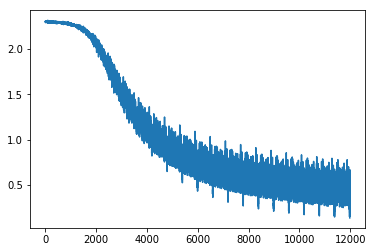

In [60]:
plt.plot(losses)

In [61]:
P, _ = nn_forward(parameters, x_train)

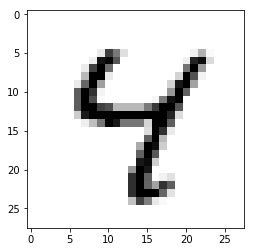

Network predicts:  1


In [62]:
i=6
visualize(x_test[i])
print("Network predicts: ", np.argmax(P[i,:]))